<a href="https://colab.research.google.com/github/nour-said/Heart_Failure_prediction/blob/main/heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)
print(df)

Mounted at /content/drive
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creati

In [ ]:
df.shape

(299, 13)

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<Axes: xlabel='anaemia', ylabel='count'>

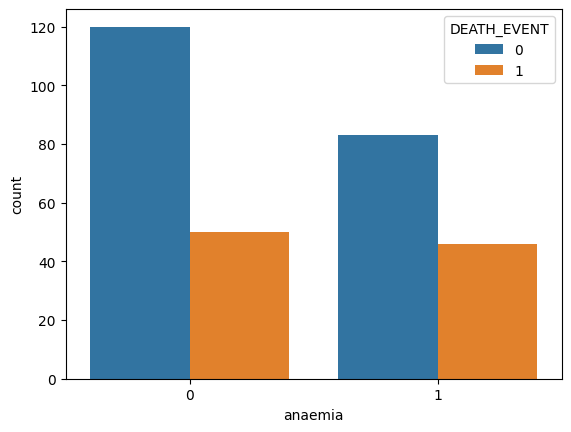

In [ ]:
sns.countplot(data= df ,x='anaemia', hue='DEATH_EVENT' )


<Axes: xlabel='high_blood_pressure', ylabel='count'>

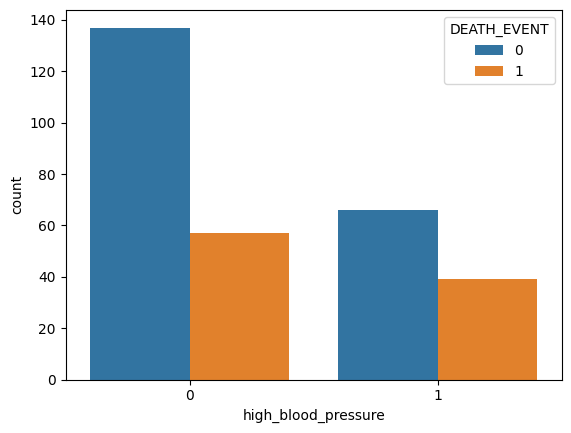

In [ ]:
sns.countplot(data= df ,x='high_blood_pressure', hue='DEATH_EVENT' )


<Axes: xlabel='diabetes', ylabel='count'>

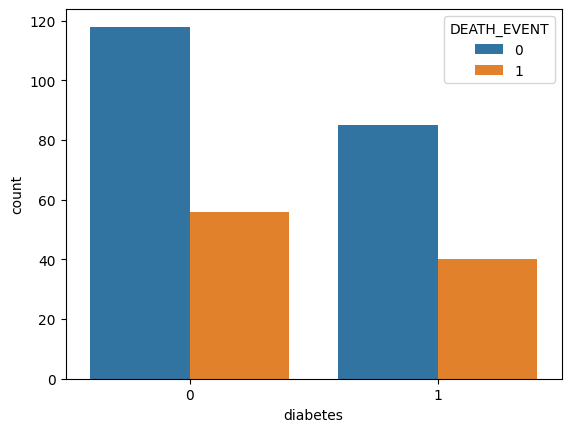

In [ ]:
sns.countplot(data= df ,x='diabetes', hue='DEATH_EVENT' )


In [ ]:
X = df.drop(columns= ['DEATH_EVENT'])
y = df['DEATH_EVENT']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)
X = norm.transform(X)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=12)

fit = test.fit(X, y)

X = fit.transform(X)

print(X[0:5,:])

[[0.63636364 0.         0.07131921 0.         0.09090909 1.
  0.29082313 0.15730337 0.48571429 1.         0.         0.        ]
 [0.27272727 0.         1.         0.         0.36363636 0.
  0.28883262 0.06741573 0.65714286 1.         0.         0.00711744]
 [0.45454545 0.         0.01569278 0.         0.09090909 0.
  0.16595951 0.08988764 0.45714286 1.         1.         0.01067616]
 [0.18181818 1.         0.01122735 0.         0.09090909 0.
  0.22414838 0.15730337 0.68571429 1.         0.         0.01067616]
 [0.45454545 1.         0.01747895 1.         0.09090909 0.
  0.36598376 0.24719101 0.08571429 0.         0.         0.01423488]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train,y_train)



LogisticRegression(max_iter=2000)

In [ ]:
percentage = log_reg.score(X_train,y_train)
print(f"Accuracy={percentage*100}%")

Accuracy=83.25358851674642%


In [ ]:
percentage = log_reg.score(X_test,y_test)
print(f"Accuracy={percentage*100}%")

Accuracy=81.11111111111111%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 10)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)*100

84.44444444444444